<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/JonasNylund/Lab-7/jonasnylund_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and Learning**
**Jonas Nylund**

# **Abstract**

In this lab, we implement gradient descent and Newtons method for optimization to find extreem points in scalar valued functions in multiple dimensions. We test both methods and conclude that they work as intended

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [157]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc;
import numpy.polynomial.polynomial as polynomial;
from scipy.stats import special_ortho_group

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# **Methods**

**Gradient descent**

Take a step in the direction of the gradient in order to find a minimum stationary point. To speed up the cnovergence rate slightly, we can use different step lengths by taking multiple steps per iteration and choosing the steplength that gives the smallest function value.


In [0]:
def grad(f, x, delta=10**(-6)):
  d = np.zeros(len(x));
  for i in range(len(x)):
    dx = np.zeros(len(x));
    dx[i] = delta/2;
    d[i] = (f(x+dx)-f(x-dx))/delta;

  return d;

def choose_step(f, df, x, max_alpha=0.1):
  best = f(x);
  a = 10**(-7);
  while a <= max_alpha:
    a *= 3;
    v = f(x-a*df);
    if(v <= best):
      best = v;
    else:
      break;
  return a;

def gradDescent(f, x0, tol=10**(-6), trace=False, max_iter=10000):
  if(type(x0) is not np.ndarray):
    if(type(x0) is float or type(x0) is int):
      x0 = [float(x0)];
    x0 = np.array(x0);

  df = grad(f,x0);
  points = [];
  points.append(x0.copy());
  i=0;
  while(np.linalg.norm(df) > tol):
    alpha = choose_step(f, df, x0);
    x0 -= alpha*df;
    df = grad(f,x0);
    
    points.append(x0.copy());
    i+=1;
    if(i > max_iter):
      print("max_iter reached");
      break;

  if(trace):
    return x0, np.array(points);
  return x0;

**Newtons method for optimization**

Similair to gradient descent, but we use the hessian matrix (Second order gradient) to choose the step length cleverer and also go in a slightly straighter line towards the optimum. Since Newtons method finds points where the gradient is zero, this means we will find both minimum and maximum points of the function, whereas gradient descent always finds mimimas.

In [0]:
def hessian(f, x, delta=10**(-3)):
  h = np.zeros((len(x),len(x)));
  for i in range(len(x)):
    dx = np.zeros(len(x))
    dx[i] = delta/2;
    h[:,i] = (grad(f,x+dx, delta=delta)-grad(f,x-dx, delta=delta))/delta;

  return h;

def newtonOpt(f, x0, tol=10**(-8), alpha=1.0, trace=False, max_iter=100):
  if(type(x0) is not np.ndarray):
    if(type(x0) is float or type(x0) is int):
      x0 = [float(x0)];
    x0 = np.array(x0);

  zero = np.zeros((len(x0), len(x0)));

  points = [];
  points.append(x0.copy());
  df = grad(f,x0);
  i=0;

  while(np.linalg.norm(df) > tol):
    hf = hessian(f,x0, delta=10**(-7));
    
    try:
      dx = np.linalg.solve(hf, df);
    except np.linalg.LinAlgError:
      ## If the hessian is zero, that means either that the function is linear or that
      ## we are inbetween two extreem points where the hessian changes
      ## sign. Since we cannot use it, reduce to gradient descent.
      dx = 0.1*df;
    x0 -= alpha*dx;
    df = grad(f,x0);
    points.append(x0.copy());

    i+=1;
    if(i > max_iter):
      print("max_iter reached");
      break;

  if(trace):
    return x0, np.array(points);
  return x0;

**Random functions in n-D**

This turned out to be the part that by far took the most time, to generate test cases in a reliable way. Heavily discussed with Helmer Nyhlen.

In [0]:
"""
## Failed attempt at generating interseting looking functions in n-D 
## that are guarranteed to have global minimum and numtiple extreem points. 
## Turned out to be hard to get good convergence, as the wierd gradient pointed
## in whatever direction and confused the algorithms

def crossPolynomial(dim, order, terms):
  p = [];
  c = (np.random.rand()-1/2)*2;
  for i in range(0,order+1):
    for j in range(i*dim):
      p.append(randomCrossProd(dim, i));
  
  ## Make the function tend to zero c*r towards inf, to guarrantee a global minimum
  #return lambda x: np.exp(-(np.linalg.norm(x)/(10*dim*order))**10);
  return lambda x: (c + np.sum([p[i](x) for i in range(len(p))]))/dim * np.exp(-(np.linalg.norm(x)/(2*order))**2) + np.linalg.norm(np.multiply(x, 1/(5*dim)))**2;

def randomCrossProd(dim, order):
  c = (np.random.rand()-1/2)*2;
  if dim > 1:
    v = [np.random.choice(dim) for i in range(order)];
    return (lambda x: c*np.prod([x[v[i]] for i in range(order)]));
  return lambda x: c*np.power(x,order);
"""

## Generate a quadratic function in n-D, that has one and only one minimum.
## Shamelessly stolen from Helmer Nyhlen.
def qf(ndim):
  
  lower = -np.ones(ndim)
  upper = np.ones(ndim)
  Q = special_ortho_group.rvs(ndim)
  L = np.diag(np.random.rand(ndim))
  A = Q.transpose() @ L @ Q
  b = lower + np.random.rand(ndim) * (upper - lower)
  f = lambda x: ((x - b).reshape((1, -1)) @ A @ (x - b))[0]
  
  return f;


#**Results**

**1D**


Start: -7.197621492642778
Result Gradient descent: -0.5 in 55 steps
Result Newton: -0.5 in 6 steps
Grad desc. grad: [-9.94093696e-07]
Newton grad: [1.22124533e-09]


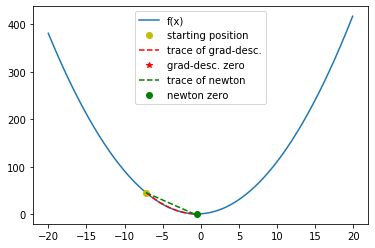

In [546]:
x0 = (np.random.rand()-1/2)*20;

#f = crossPolynomial(1, 2, 2);
f = lambda x: np.power(x,2)+x+1;


X = np.arange(-20,20,0.1);
Y = [f(x) for x in X];

plt.plot(X,Y, label="f(x)");
plt.plot(x0, f([x0]), 'yo', label="starting position");

z1, t1 = gradDescent(f, x0, trace=True);
z2, t2 = newtonOpt(f, x0, trace=True);

if(abs(z1[0])> 100):
  print("diverge")
  print(f);
  print(z1);
else:
  plt.plot(t1, [f(x) for x in t1], 'r--', label="trace of grad-desc.");
  plt.plot(z1, f(z1), 'r*', label="grad-desc. zero");

plt.plot(t2, [f(x) for x in t2], 'g--', label="trace of newton");
plt.plot(z2, f(z2), 'go', label="newton zero");


plt.legend();
#print("True zero:", round(xp0,5));
print("Start:", x0);
print("Result Gradient descent:", round(z1[0], 5), "in", len(t1), "steps");
print("Result Newton:", round(z2[0], 5), "in", len(t2), "steps");

print("Grad desc. grad:", grad(f, z1)); 
print("Newton grad:", grad(f, z2));

**2D**

Result Gradient descent: [-0.77945, -0.20146] in 206 steps
Result Newton: [-0.77945, -0.20146] in 9 steps
Grad desc. grad: [-1.91853649e-07  9.65928023e-07]
Newton grad: [6.03669778e-13 2.92523799e-14]


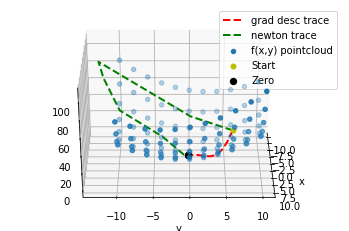

In [554]:
#xp0 = -np.random.rand(2);
#x0 = -np.random.rand(2);
#f = randomPolynomial(2,2, x0=x0, xp0=xp0);
#f = lambda x: x[0]*x[1] + x[0]**2 + 2*x[1]**2 + x[0] - x[1] + 1;

#f = crossPolynomial(2, 2, 6);
f = qf(2);


X = np.arange(-10,11,2);
Y = np.arange(-10,11,2);
X,Y = np.meshgrid(X,Y);

Z = [f(p) for p in zip(X.flatten(), Y.flatten())];
Z = np.reshape(Z,X.shape);

fig = plt.figure()
ax = fig.gca(projection='3d');
ax.scatter(X,Y,Z, label="f(x,y) pointcloud");
init = (np.random.rand(2)-1/2)*20;

z1, t1 = gradDescent(f, init.copy(), trace=True);
z2, t2 = newtonOpt(f, init.copy(), trace=True);

zt1 = [f(p) for p in t1];
zt2 = [f(p) for p in t2];

#print("True zero:", [round(i,5) for i in xp0]);
print("Result Gradient descent:", [round(i,5) for i in z1], "in", len(t1), "steps");
print("Result Newton:", [round(i,5) for i in z2], "in", len(t2), "steps");

print("Grad desc. grad:", grad(f, z1)); 
print("Newton grad:", grad(f, z2));

ax.scatter3D(init[0], init[1], f(init), c="y", s=25, label="Start");
ax.plot3D(t1[:,0], t1[:,1], zt1, 'r--', linewidth=2, label="grad desc trace");
ax.plot3D(t2[:,0], t2[:,1], zt2, 'g--', linewidth=2, label="newton trace");
ax.scatter3D(z1[0], z1[1], f(z1), c="k", s=40);
ax.scatter3D(z2[0], z2[1], f(z2), c="k", s=40, label="Zero");

plt.xlabel("x");
plt.ylabel("y");

ax.legend(loc="upper right");

def update(i):
  ax.view_init(30, 4*i);

anim = FuncAnimation(fig, update, frames=320//4, interval=100);
rc('animation', html='html5')
HTML(anim.to_html5_video())


**Convergence rate**

It is pretty clear that Newtons method converges alot faster than Gradient descent (GD). In this particulair case, it can also be seen that the GD method benefits from having a variable steplength, as it can use the longer steps earlier in the iteration, and the take smaller steps when getting closer to the solution.

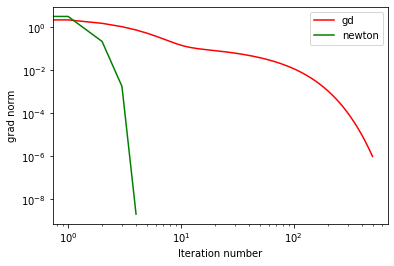

In [559]:
dim = np.random.randint(2,10);
f = qf(dim);
init = (np.random.rand(dim)-1/2);

z1, t1 = gradDescent(f, init.copy(), trace=True);
z2, t2 = newtonOpt(f, init.copy(), trace=True);

v1 = [np.linalg.norm(grad(f, t1[i])) for i in range(len(t1))];
v2 = [np.linalg.norm(grad(f, t2[i])) for i in range(len(t2))];

v2 = [np.linalg.norm(grad(f, init))] + v2;


plt.figure()
plt.loglog(v1, 'r', label="gd");
plt.loglog(v2, 'g', label="newton");
plt.legend();
plt.xlabel("Iteration number");
plt.ylabel("grad norm")
plt.show()

**Accuracy**

Checking both methods against a random quadratic function in 2-10 dimensions, we find that both methods finds the extreem point for each function, starting at random points on the volume.

In [553]:
def checkres(f, x0):
  if np.linalg.norm(grad(f, x0)) < 10**(-4):
    return True;

  print(x0)
  print(f(x0))
  print(grad(f, x0));
  print(np.linalg.norm(grad(f, x0)));
  return False;

def test_qf():
  dim = np.random.randint(2,10);

  f = qf(dim);

  init = (np.random.rand(dim)-1/2);

  z1 = gradDescent(f, init.copy());
  z2 = newtonOpt(f, z1+init.copy());

  assert checkres(f, z1);
  assert checkres(f, z2);


n = 500;
for i in range(n):
  test_qf();
  if((i+1) % (n//10) == 0):
    print(100*(i+1)//n, "% done");

print("All tests passes");

10 % done
20 % done
max_iter reached
30 % done
max_iter reached
40 % done
50 % done
60 % done
70 % done
80 % done
90 % done
max_iter reached
100 % done
All tests passes


# **Discussion**

Since both methods seems to find the extreem points, we conclude that they work. Newtons method is considerably faster than GD, which is to be expected. The GD method sometimes reaches the maximum allowed iterations limit, but when doing so, it is close enough to the solution that we allow the result as valid. In a real world scenario, we might use GD with alot fewer iterations to get to coarse solution, and use it as an initial guess for newtons method, which requires that we are close-ish to a solution for it to converge fast.
This is not implemented here though.

Also, handing in a lab two days before the exam might not be the best idea ever...